In [2]:
from quantum.algorithms import Simons
from quantum.gates import AutoOracleGate

def f(x):
    # Function {0,1}^4 \to {0,1}^4 with xor mask s=5
    if x == 0 or x == 5:
        return 0
    elif x == 1 or x == 4:
        return 1
    elif x == 2 or x == 7:
        return 2
    elif x == 3 or x == 6:
        return 3
    elif x == 8 or x == 13:
        return 4
    elif x == 9 or x == 12:
        return 5
    elif x == 10 or x == 15:
        return 6
    elif x == 11 or x == 14:
        return 7

n = 4
m = 4
oracle = AutoOracleGate(f, n, m)
algorithm = Simons(oracle.get_native(), n, m)
qc = algorithm.build_circuit()

In [3]:
from qiskit import transpile
from qiskit_aer import AerSimulator

def simulate_qc(qc):
    simulator = AerSimulator()
    qct = transpile(qc, backend=simulator)
    return simulator.run(qct, shots=10, memory=False).result().get_counts()
result = algorithm.run(simulate_qc)
result

5

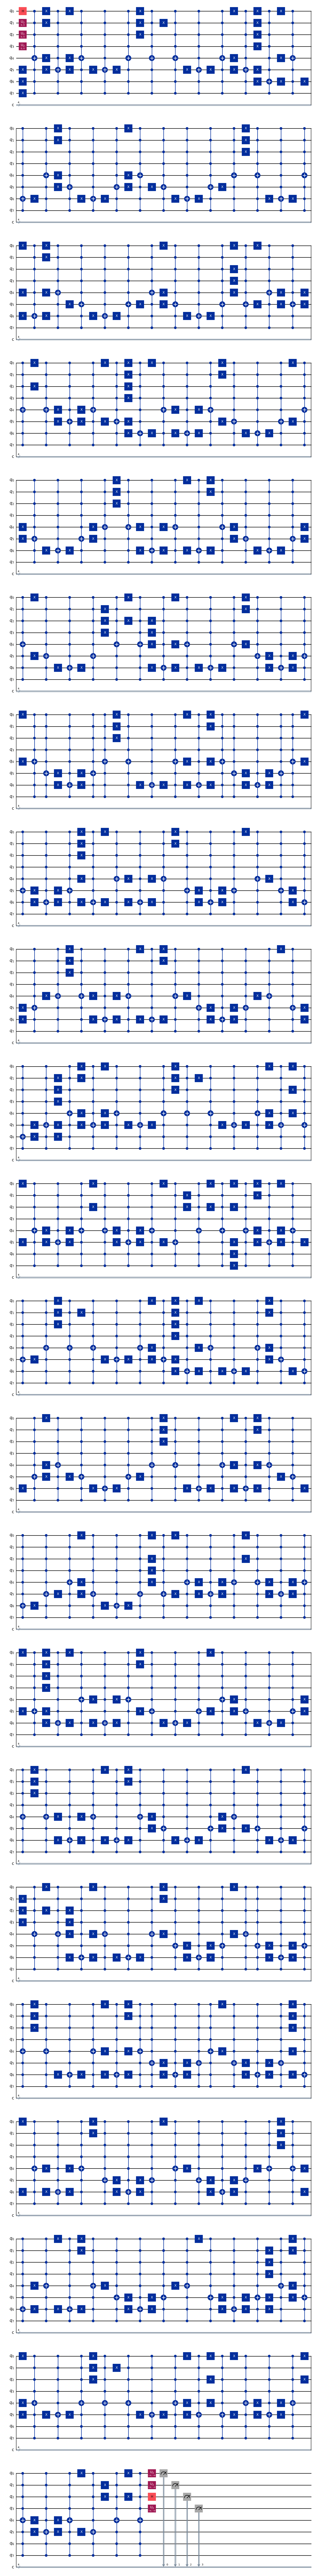

In [4]:
simulator = AerSimulator()
qct = transpile(qc, backend=simulator)
qct.draw("mpl")